# IMinuit

Minuit - программа численной минимизации функций многих переменных, широко применяемая в физике элементарных частиц. Есть два питонских интерфейса, PyMinuit и IMinuit (он особенно удобен в ipython).

In [1]:
from iminuit import Minuit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Простой пример

Определим квадратичную функцию от двух параметров.

In [2]:
def f(a,b):
    return 10*a**2+10*b**2-16*a*b+12*a-24*b

Создадим объект класса `Minuit`. `a` и `b` - грубые догадки, около чего надо искать минимум; `error_a` и `error_b` - оценки точности этих догадок (в начале минимизации программа будет делать шаги порядка этих величин, потом они будут уменьшаться). Пределы изменения задавать не обязательно. Валичина `errordef` показывает, насколько функция должна быть выше своего минимума, чтобы это считалось отклонением на одну сигму; поскольку минимизируемая функция - это, как правило, $\chi^2$, значение 1 по умолчанию вполне годится.

In [3]:
m=Minuit(f,a=0,error_a=1,limit_a=(-10,10),
         b=0,error_b=1,limit_b=(-10,10))

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  


Наиболее популярный метод минимизации - `migrad`.

In [4]:
m.migrad()

FCN = -17.999997281186666 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 2.7187527367825896e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,0.999823,0.526788,0,0,-10.0,10.0,
2,b,1.99935,0.526776,0,0,-10.0,10.0,


({'fval': -17.999997281186666, 'edm': 2.7187527367825896e-06, 'nfcn': 36, 'up': 1.0, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': True, 'has_posdef_covar': True, 'has_made_posdef_covar': False, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'a', 'value': 0.9998227792225478, 'error': 0.5267876810263843, 'is_const': False, 'is_fixed': False, 'has_limits': True, 'has_lower_limit': True, 'has_upper_limit': True, 'lower_limit': -10.0, 'upper_limit': 10.0},
  {'number': 1, 'name': 'b', 'value': 1.9993477581584944, 'error': 0.5267762744877214, 'is_const': False, 'is_fixed': False, 'has_limits': True, 'has_lower_limit': True, 'has_upper_limit': True, 'lower_limit': -10.0, 'upper_limit': 10.0}])

Значения параметров.

In [5]:
m.values

{'a': 0.9998227792225478, 'b': 1.9993477581584944}

Значение функции в точке минимума.

In [6]:
m.fval

-17.999997281186666

Ошибки параметров.

In [7]:
m.errors

{'a': 0.5267876810263843, 'b': 0.5267762744877214}

Если, скажем, $a$ - наш окончательный физический результат, то мы напишем в статье $a=1\pm0.5$. На самом деле у нас есть больше информации, поскольку ошибки $a$ и $b$ сильно скоррелированы. Матрица корреляции ошибок:

In [8]:
m.matrix()

((0.27776493841711364, 0.22220727646667665),
 (0.22220727646667665, 0.27776101882046583))

Минимизация квадратичной формы сводится к решению системы линейных уравнений, а матрица корреляции ошибок - обратная матрица этой системы. В таком простом случае не имеет смысла использовать инструмент минимизации произвольных функций, такой, как Minuit.

In [9]:
M=array([[10.,-8.],[-8.,10.]])
M=inv(M)
M

array([[ 0.27777778,  0.22222222],
       [ 0.22222222,  0.27777778]])

In [10]:
M@array([[-6],[12]])

array([[ 1.],
       [ 2.]])

Нарисуем контуры, соответствующие отклонению на 1, 2 и 3 сигмы от оптимальной точки.

(array([-1.03835166, -0.997266  , -0.95618035, -0.9150947 , -0.87400905,
        -0.8329234 , -0.79183775, -0.7507521 , -0.70966645, -0.6685808 ,
        -0.62749514, -0.58640949, -0.54532384, -0.50423819, -0.46315254,
        -0.42206689, -0.38098124, -0.33989559, -0.29880994, -0.25772428,
        -0.21663863, -0.17555298, -0.13446733, -0.09338168, -0.05229603,
        -0.01121038,  0.02987527,  0.07096092,  0.11204657,  0.15313223,
         0.19421788,  0.23530353,  0.27638918,  0.31747483,  0.35856048,
         0.39964613,  0.44073178,  0.48181743,  0.52290309,  0.56398874,
         0.60507439,  0.64616004,  0.68724569,  0.72833134,  0.76941699,
         0.81050264,  0.85158829,  0.89267395,  0.9337596 ,  0.97484525,
         1.0159309 ,  1.05701655,  1.0981022 ,  1.13918785,  1.1802735 ,
         1.22135915,  1.26244481,  1.30353046,  1.34461611,  1.38570176,
         1.42678741,  1.46787306,  1.50895871,  1.55004436,  1.59113001,
         1.63221567,  1.67330132,  1.71438697,  1.7

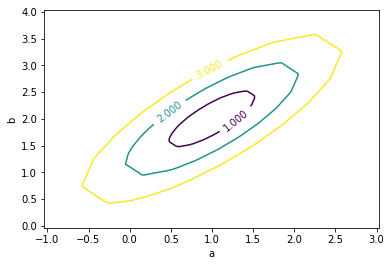

In [11]:
m.draw_mncontour('a','b',nsigma=3)

То же в виде цветов.

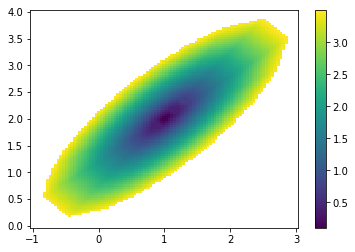

In [12]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

## Дайте мне 3 параметра, и я профитирую слона. С 4 параметрами он будет махать хоботом.

Пусть у нас есть экспериментальные данные, и мы хотим профитировать их прямой.

In [13]:
def fit(a,b,x):
    return a*x+b

Данные не настоящие, а сгенерированные. Все имеют ошибки 0.1.

In [14]:
x=linspace(0,1,11)
dy=0.1*ones(11)
y=x+dy*normal(size=11)

Функция $\chi^2$.

In [15]:
def chi2(a,b):
    global x,y,dy
    return (((y-fit(a,b,x))/dy)**2).sum()

Минимизируем.

In [16]:
m=Minuit(chi2,a=0,b=0,error_a=1,error_b=1)

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.


In [17]:
m.migrad()

FCN = 17.644418929505377 
 TOTAL NCALL = 32 
 NCALLS = 32 
 
 
 EDM = 4.646403811874004e-23 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,1.06563,0.0953463,0,0,,,
2,b,-0.0337525,0.0564076,0,0,,,


({'fval': 17.644418929505377, 'edm': 4.646403811874004e-23, 'nfcn': 32, 'up': 1.0, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': True, 'has_posdef_covar': True, 'has_made_posdef_covar': False, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'a', 'value': 1.0656301806229376, 'error': 0.09534625880413838, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0},
  {'number': 1, 'name': 'b', 'value': -0.03375249916931122, 'error': 0.05640760739068982, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0}])

In [18]:
m.values

{'a': 1.0656301806229376, 'b': -0.03375249916931122}

In [19]:
m.fval

17.644418929505377

In [20]:
m.matrix()

((0.009090909067945735, -0.004545454529982192),
 (-0.004545454529982192, 0.0031818181715422044))

(array([ 0.69687852,  0.7043112 ,  0.71174387,  0.71917655,  0.72660922,
         0.7340419 ,  0.74147457,  0.74890724,  0.75633992,  0.76377259,
         0.77120527,  0.77863794,  0.78607062,  0.79350329,  0.80093596,
         0.80836864,  0.81580131,  0.82323399,  0.83066666,  0.83809934,
         0.84553201,  0.85296468,  0.86039736,  0.86783003,  0.87526271,
         0.88269538,  0.89012806,  0.89756073,  0.9049934 ,  0.91242608,
         0.91985875,  0.92729143,  0.9347241 ,  0.94215678,  0.94958945,
         0.95702212,  0.9644548 ,  0.97188747,  0.97932015,  0.98675282,
         0.9941855 ,  1.00161817,  1.00905084,  1.01648352,  1.02391619,
         1.03134887,  1.03878154,  1.04621422,  1.05364689,  1.06107956,
         1.06851224,  1.07594491,  1.08337759,  1.09081026,  1.09824294,
         1.10567561,  1.11310828,  1.12054096,  1.12797363,  1.13540631,
         1.14283898,  1.15027166,  1.15770433,  1.165137  ,  1.17256968,
         1.18000235,  1.18743503,  1.1948677 ,  1.2

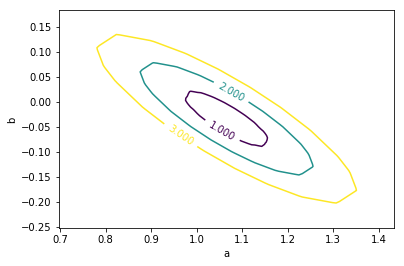

In [21]:
m.draw_mncontour('a','b',nsigma=3)

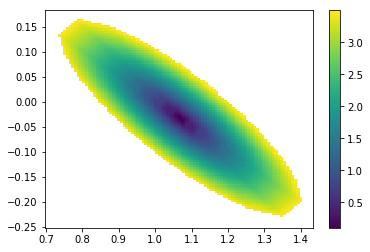

In [22]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

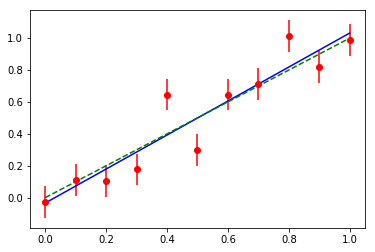

In [23]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(0,1,101)
plot(xt,fit(m.values['a'],m.values['b'],xt),'b-')
plot(xt,fit(1,0,xt),'g--')

Когда фитирующая функция есть линейная комбинация каких-то фиксированных функций с неизвестными коэффициентами, минимизация $\chi^2$ сводится к решению системы линейных уравнений. Нет надобности использовать Minuit.

## Резонанс без фона

Пусть теперь наша фитирующая функция - Брейт-Вигнеровский резонанс (без фона), с двумя параметрами - положением и шириной (лучше бы ввести третий - высоту, но я не стал этого делать для простоты). Теперь $\chi^2$ - сложная нелинейная функция параметров.

In [24]:
def fit(x0,Gamma,x):
    return 1/((x-x0)**2+Gamma**2)

Вот наши экспериментальные данные (с ошибками 0.1).

In [25]:
x=linspace(-3,3,21)
dy=0.1*ones(21)
y=fit(0,1,x)+dy*normal(size=21)

Минимизируем $\chi^2$.

In [26]:
def chi2(x0,Gamma):
    global x,y,dy
    return (((y-fit(x0,Gamma,x))/dy)**2).sum()

In [27]:
m=Minuit(chi2,x0=0,error_x0=1,Gamma=1,error_Gamma=1)

/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.


In [28]:
m.migrad()

FCN = 35.747379402362355 
 TOTAL NCALL = 29 
 NCALLS = 29 
 
 
 EDM = 1.5113944332374378e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,x0,-0.00899077,0.0659539,0,0,,,
2,Gamma,0.991722,0.0266705,0,0,,,


({'fval': 35.747379402362355, 'edm': 1.5113944332374378e-07, 'nfcn': 29, 'up': 1.0, 'is_valid': True, 'has_valid_parameters': True, 'has_accurate_covar': True, 'has_posdef_covar': True, 'has_made_posdef_covar': False, 'hesse_failed': False, 'has_covariance': True, 'is_above_max_edm': False, 'has_reached_call_limit': False},
 [{'number': 0, 'name': 'x0', 'value': -0.008990774854701301, 'error': 0.06595389618462269, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0},
  {'number': 1, 'name': 'Gamma', 'value': 0.991722016714531, 'error': 0.026670486505639225, 'is_const': False, 'is_fixed': False, 'has_limits': False, 'has_lower_limit': False, 'has_upper_limit': False, 'lower_limit': 0.0, 'upper_limit': 0.0}])

In [29]:
m.values

{'Gamma': 0.991722016714531, 'x0': -0.008990774854701301}

In [30]:
m.fval

35.747379402362355

In [31]:
m.errors

{'Gamma': 0.026670486505639225, 'x0': 0.06595389618462269}

In [32]:
m.matrix()

((0.004349916421931988, -2.3890408807357486e-05),
 (-2.3890408807357486e-05, 0.000711314850447484))

(array([-0.26708525, -0.26191248, -0.25673971, -0.25156695, -0.24639418,
        -0.24122141, -0.23604865, -0.23087588, -0.22570312, -0.22053035,
        -0.21535758, -0.21018482, -0.20501205, -0.19983928, -0.19466652,
        -0.18949375, -0.18432098, -0.17914822, -0.17397545, -0.16880269,
        -0.16362992, -0.15845715, -0.15328439, -0.14811162, -0.14293885,
        -0.13776609, -0.13259332, -0.12742055, -0.12224779, -0.11707502,
        -0.11190226, -0.10672949, -0.10155672, -0.09638396, -0.09121119,
        -0.08603842, -0.08086566, -0.07569289, -0.07052012, -0.06534736,
        -0.06017459, -0.05500183, -0.04982906, -0.04465629, -0.03948353,
        -0.03431076, -0.02913799, -0.02396523, -0.01879246, -0.01361969,
        -0.00844693, -0.00327416,  0.0018986 ,  0.00707137,  0.01224414,
         0.0174169 ,  0.02258967,  0.02776244,  0.0329352 ,  0.03810797,
         0.04328074,  0.0484535 ,  0.05362627,  0.05879903,  0.0639718 ,
         0.06914457,  0.07431733,  0.0794901 ,  0.0

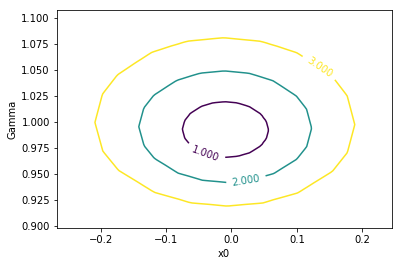

In [33]:
m.draw_mncontour('x0','Gamma',nsigma=3)

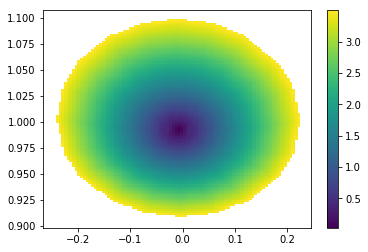

In [34]:
x0,Gamma,g,r=m.mncontour_grid('x0','Gamma',nsigma=3)
pcolormesh(x0,Gamma,g)
colorbar()

Теперь контуры постоянной высоты $\chi^2$ - уже не симметричные эллипсы с центром в оптимальной точке, а какие-то сложные кривые. Ошибки положения и ширины резонанса довольно-таки независимы.

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

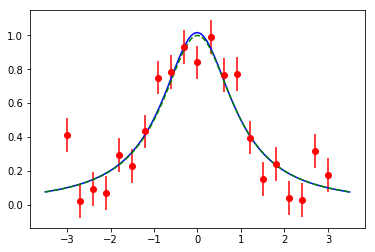

In [35]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(-3.5,3.5,101)
plot(xt,fit(m.values['x0'],m.values['Gamma'],xt),'b-')
plot(xt,fit(0,1,xt),'g--')